In [1]:
import cv2
import numpy as np
import random as rnd
#import seaborn as sns 
from keras.callbacks import ModelCheckpoint
from make_model import *
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img#from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

seed = 11
rnd.seed(seed)
np.random.seed(seed)

model = make_model()
epochs = 100
winH,winW = 50,50

############################

batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
		rescale=1./255,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'data/train',  # this is the target directory
        target_size=(winH, winW),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(winH, winW),
        batch_size=batch_size,
        class_mode='binary')

filepath="weights_best.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

class_weight = {0: 10,
                1: 1}
				
history = model.fit_generator(
        train_generator,
        steps_per_epoch=5131 // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=1603 // batch_size,
        callbacks=callbacks_list,
        class_weight=class_weight)

print(type(history))

ModuleNotFoundError: No module named 'keras'

In [6]:
loss = history.history['val_loss']
loss

[0.8591295480728149,
 0.522468626499176,
 0.42563748359680176,
 0.7044389247894287,
 0.3652016520500183,
 0.37526488304138184,
 0.5208041667938232,
 0.31707173585891724,
 0.8269519805908203,
 0.7807868123054504,
 0.4021843373775482,
 0.3422110080718994,
 0.3517906963825226,
 0.3454015254974365,
 0.30538392066955566,
 0.2131659835577011,
 0.4027520716190338,
 0.35342562198638916,
 0.40107905864715576,
 0.3620859384536743,
 0.30674365162849426,
 0.2325410097837448,
 0.2884681522846222,
 0.39124447107315063,
 0.27746620774269104,
 0.3238879144191742,
 0.2820132076740265,
 0.5703983902931213,
 0.4743170440196991,
 0.3661062717437744,
 0.35103291273117065,
 0.22992101311683655,
 0.24324984848499298,
 0.24185732007026672,
 0.3363455533981323,
 0.2393060177564621,
 0.3578178286552429,
 0.2810559868812561,
 0.34377026557922363,
 0.5588552355766296,
 0.24339362978935242,
 0.23758000135421753,
 0.34158775210380554,
 0.3232596516609192,
 0.2603975534439087,
 0.627534031867981,
 0.3117725253105163

In [3]:
from matplotlib import pyplot as plt

In [4]:
%matplotlib inline

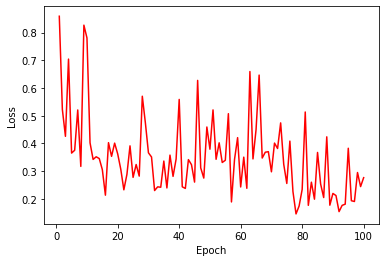

In [7]:
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, loss, 'r')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();
